## Data Related Position Salaries 2023

📁 Project Overview
This project explores the 2020 - 2023  (mainly 2022-2023) Data Science Salary dataset from Kaggle. It focuses on understanding compensation trends across job roles, regions, experience levels, and company types within the data industry.

The analysis aims to uncover insights into global salary patterns and workplace structures in the data science domain.

📂 Dataset Info
Source: Kaggle

File: data-science-salaries-2023.csv

Key columns:

job_title

salary_in_usd

experience_level (EN, MI, SE, EX)

employment_type (FT, PT, CT, FL)

remote_ratio (0 = On-site, 50 = Hybrid, 100 = Remote)

company_location, employee_residence

In [2]:
import os
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import pycountry

In [ ]:
# Set the Kaggle configuration directory (temporarily for this script)
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\Yijia Wang\Desktop\Training\.kaggle'

In [ ]:
# load the kaggle dataset
# https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
!kaggle datasets download -d arnabchaki/data-science-salaries-2023

Dataset URL: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023


  0%|          | 0.00/25.4k [00:00<?, ?B/s]
100%|██████████| 25.4k/25.4k [00:00<00:00, 3.60MB/s]



License(s): DbCL-1.0



In [5]:
# set the path for the zip file and extraction directory
zip_path = r"c:\Users\Yijia Wang\Desktop\Training\Self_Project\DS_JOB_MARKET\data-science-salaries-2023.zip"
extract_path = r"c:\Users\Yijia Wang\Desktop\Training\Self_Project\DS_JOB_MARKET"

# upzip the downloaded file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("unzip completed successfully.")

unzip completed successfully.


In [6]:
csv_path = os.path.join(extract_path, "ds_salaries.csv")
salary = pd.read_csv(csv_path)
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [30]:
# change column 'remote_ratio' to categorical and map 100% to 'remote', 50% to 'hybrid', and 0% to 'on-site'
salary['remote_ratio'] = salary['remote_ratio'].map({
    100: 'remote',
    50: 'hybrid',
    0: 'on-site'
})
salary['remote_ratio'] = salary['remote_ratio'].astype('category')

In [31]:
# change column 'experience_level' to categorical and map 'EN' to 'entry', 'MI' to 'mid', 'SE' to 'senior', and 'EX' to 'executive'
salary['experience_level'] = salary['experience_level'].map({
    'EN': 'entry',
    'MI': 'mid',
    'SE': 'senior',
    'EX': 'executive'
})

In [32]:
# Write a function to format y-axis labels as dollar amounts
def format_y_as_dollar(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))


In [9]:
# Pack the salary boxplot function which can be used to visualize the salary distribution by different categories
def salary_boxplot(
    data,
    x,
    y='salary_in_usd',
    palette='Set3',
    showfliers=False,
    rotate_xticks=True,
    xtick_angle=45,
    xlabel_fontsize=10,
    title='Salary Distribution',
    xlabel=None,
    ylabel='Salary',
    figsize=(12, 6),
    format_y=True
):
    plt.figure(figsize=figsize)
    
    sns.boxplot(x=x, y=y, hue=x, data=data, palette=palette, legend=False, showfliers=showfliers)
    
    if rotate_xticks:
        plt.xticks(rotation=xtick_angle, fontsize=xlabel_fontsize)
    
    plt.title(title, fontsize=14, weight='bold')
    plt.suptitle('Data Science Salaries 2023 (USD)', fontsize=10, y=1.02, color='gray')
    
    # default xlabel is the x column name with spaces instead of underscores
    if xlabel:
        plt.xlabel(xlabel)
    else:
        plt.xlabel(x.replace('_', ' ').title())
    
    plt.ylabel(ylabel)
    
    if format_y:
        format_y_as_dollar()
    
    plt.tight_layout()
    plt.show()

### EDA

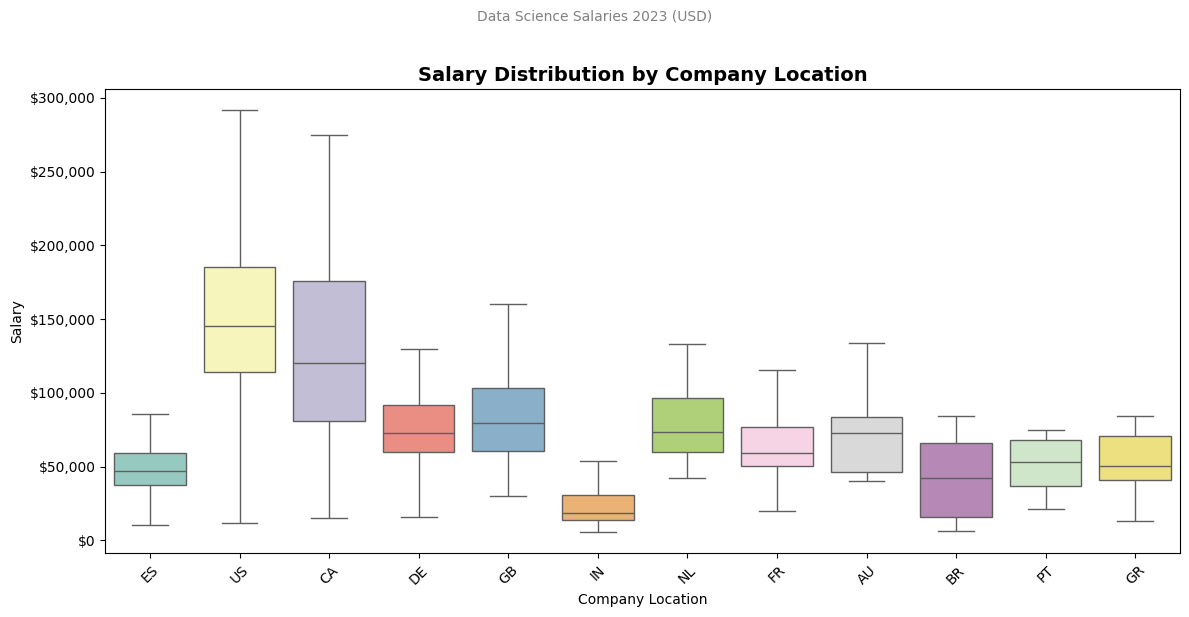

In [10]:
# Boxplot for salary vs company location
# remove outliers for better visualization
# filter out locations with only a few entries(less than 10)
valid_locations = salary['company_location'].value_counts()
valid_locations = valid_locations[valid_locations > 10].index
major_country = salary[salary['company_location'].isin(valid_locations)]
salary_boxplot(data=major_country, x='company_location', title='Salary Distribution by Company Location')

<small>

**Country Code Reference Table:**

| Code | Country       |
|------|---------------|
| ES   | Spain         |
| US   | America       |
| CA   | Canada        |
| DE   | Germany       |
| GB   | England       |
| NL   | Netherlands   |
| FR   | France        |
| AU   | Australia     |
| BR   | Brazil        |
| PT   | Portugal      |
| GR   | Greece        |

In [11]:
# build a function to convert alpha-2 country codes to alpha-3 codes
def alpha2_to_alpha3(alpha2):
    try:
        return pycountry.countries.get(alpha_2=alpha2).alpha_3
    except:
        return None

In [12]:
# calculate average salary by company location
avg_salary_country = salary.groupby('company_location')['salary_in_usd'].mean().reset_index()

avg_salary_country['country_code'] = avg_salary_country['company_location'].apply(alpha2_to_alpha3)
avg_salary_country

# Plotting the average salary by company location using Plotly
fig = px.choropleth(
    avg_salary_country,
    locations='country_code',      # ISO Alpha-3 code
    color='salary_in_usd',
    color_continuous_scale='Viridis',
    title='Average Data Salary by Company Location (USD)',
    labels={'salary_in_usd': 'Avg Salary'},
    projection='natural earth'
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [13]:
# check the number of entries for major company location
major_country['company_location'].value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
PT      14
AU      14
GR      14
NL      13
Name: count, dtype: int64

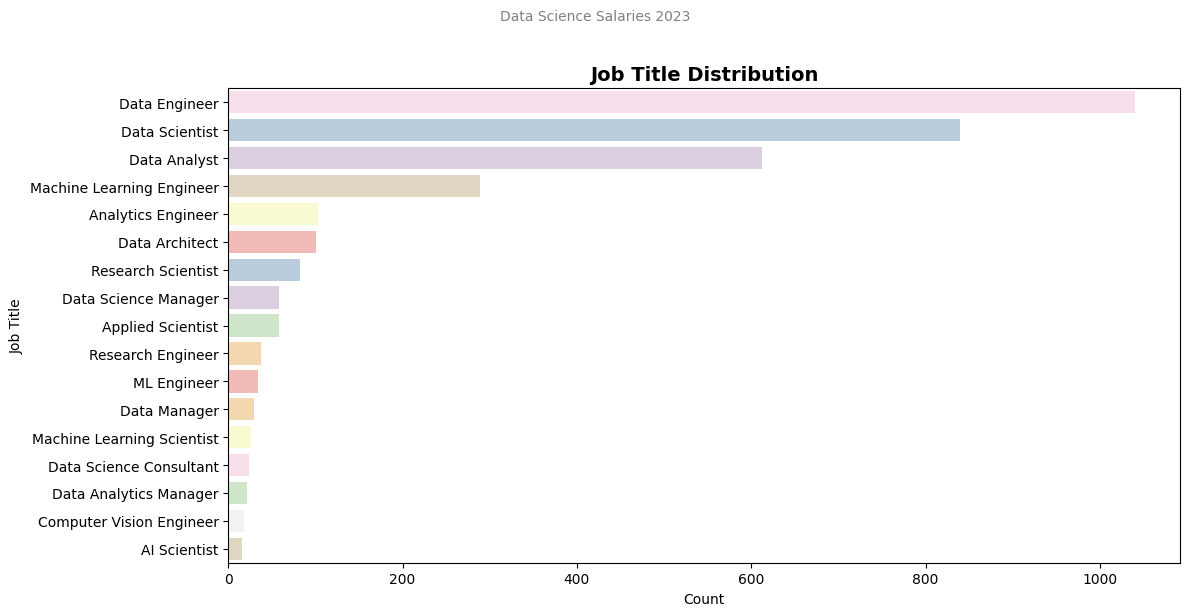

In [14]:
# explore the job title distribution with barplot
# filter out job titles with only a few entries(less than 15)
valid_job_titles = salary['job_title'].value_counts()
valid_job_titles = valid_job_titles[valid_job_titles > 15].index
major_job = salary[salary['job_title'].isin(valid_job_titles)]
plt.figure(figsize=(12, 6))
sns.countplot(data=major_job, y='job_title', hue='job_title', legend=False, order=major_job['job_title'].value_counts().index, palette='Pastel1')
plt.title('Job Title Distribution', fontsize=14, weight='bold')
plt.suptitle('Data Science Salaries 2023', fontsize=10, y=1.02, color='gray')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.xticks(fontsize=10)
plt.tight_layout()

In [15]:
# Check the number of entries for major job titles
major_job['job_title'].value_counts()

job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Computer Vision Engineer        18
AI Scientist                    16
Name: count, dtype: int64

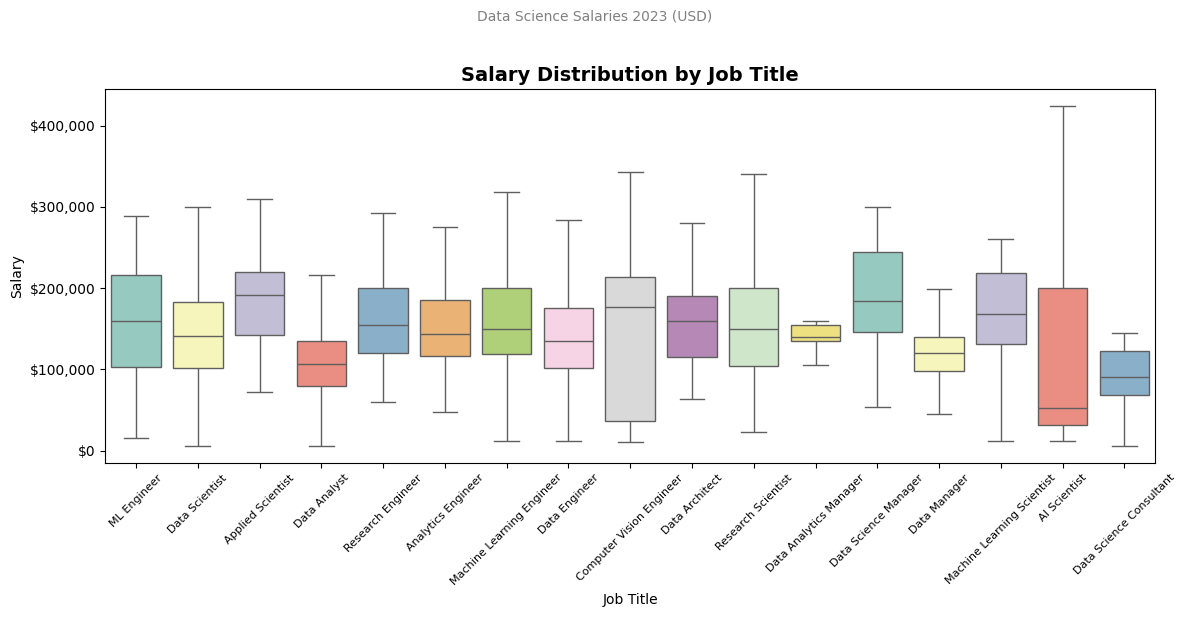

In [16]:
# explore the salary distribution by job_title
salary_boxplot(data=major_job, x='job_title', title='Salary Distribution by Job Title', xlabel_fontsize=8)

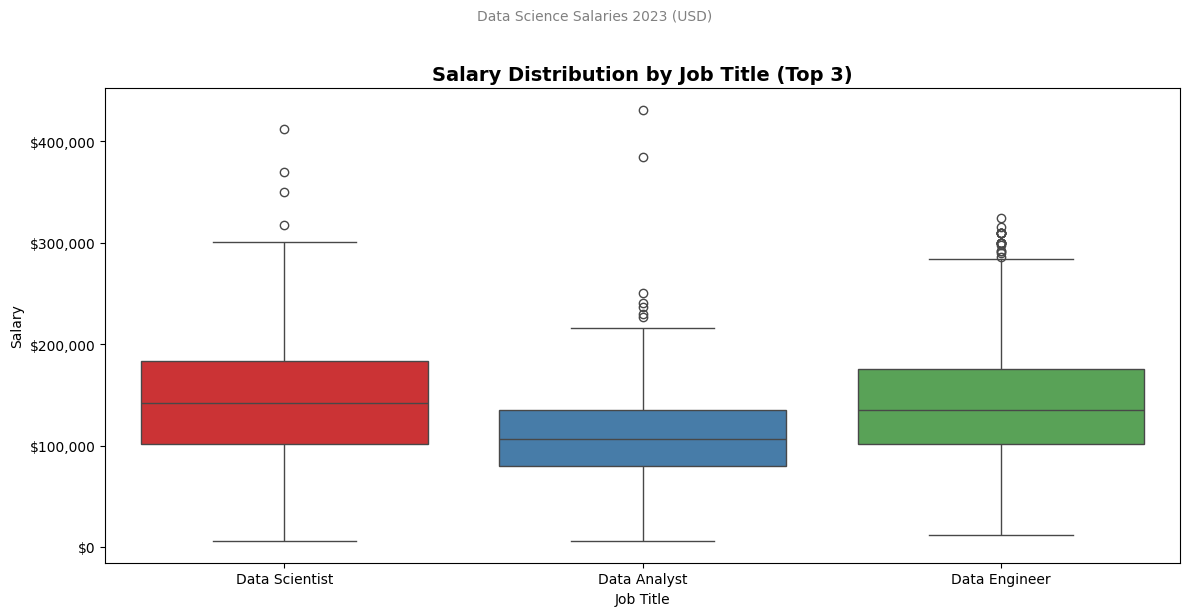

In [17]:
# compare the most common three job titles
job_titles = major_job['job_title'].value_counts().index[:3]
# filter the data for the three job titles
major_job3 = major_job[major_job['job_title'].isin(job_titles)]
# Boxplot for salary vs job title for the three most common job titles
salary_boxplot(
    data=major_job3,
    x='job_title',
    title='Salary Distribution by Job Title (Top 3)',
    rotate_xticks=False,
    palette='Set1',
    showfliers=True
)

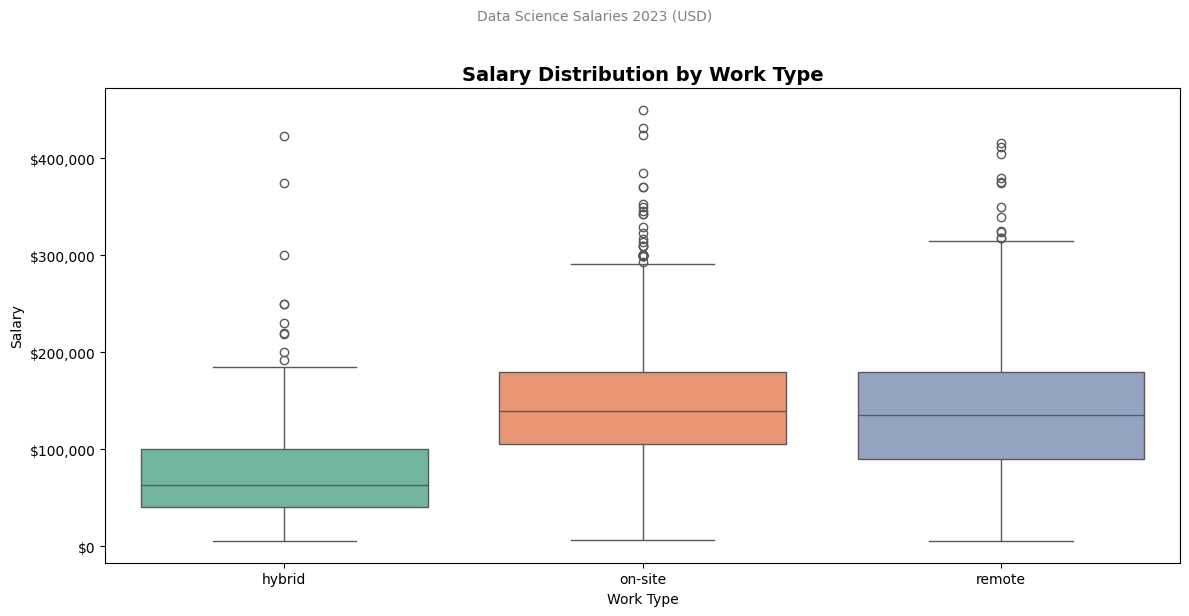

In [18]:
# explore remote, hybrid, and on-site work salary distribution
salary_boxplot(
    data=salary,
    x='remote_ratio',
    title='Salary Distribution by Work Type',
    xlabel='Work Type',
    palette='Set2',
    showfliers=True,
    xtick_angle=0
)

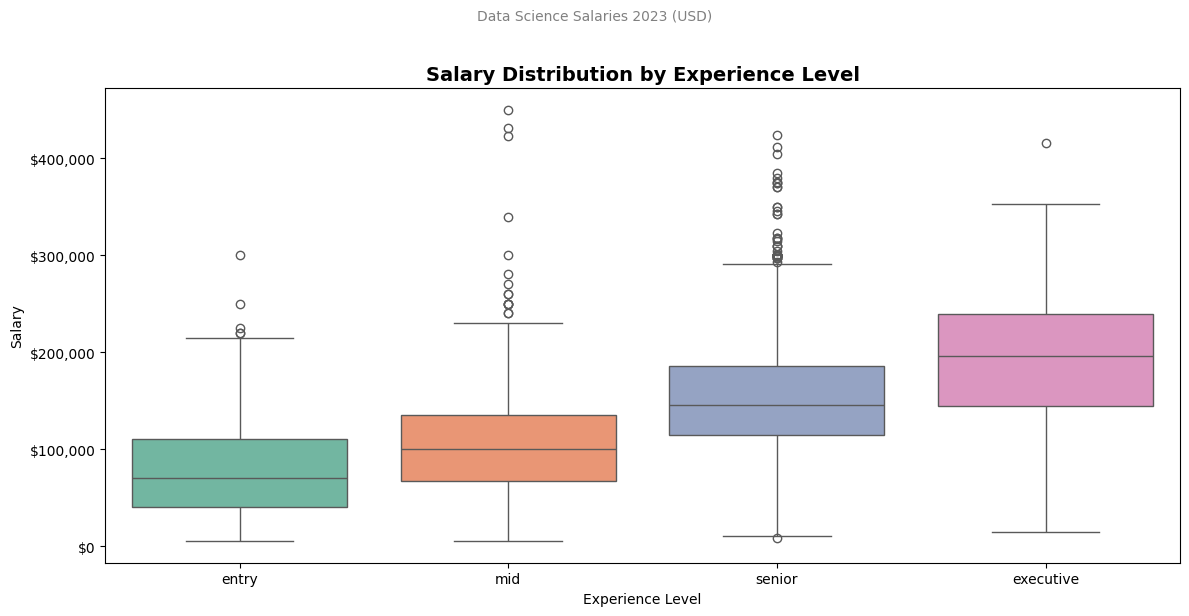

In [19]:
# explore the changes of salary for different experience levels
# follow the order from entry to executive
salary['experience_level'] = pd.Categorical(salary['experience_level'], categories=['entry', 'mid', 'senior', 'executive'], ordered=True)
salary_boxplot(
    data=salary,
    x='experience_level',
    title='Salary Distribution by Experience Level',
    xlabel='Experience Level',
    palette='Set2',
    showfliers=True,
    xtick_angle=0
)

### Insight Analysis

> The following analysis focuses only on companies located in the **United States (US)**.

---

This section explores deeper and practical questions related to data positions, filtered by company location = `US`.


#### For only entry level jobs, what combination of job title and work type has the highest salary?

In [20]:
# focus on only entry-level data
entry_salary = salary[salary['experience_level'] == 'entry']
us_entry_salary = entry_salary[entry_salary['company_location'] == 'US']
# Group by job title and remote ratio, then calculate the mean salary
us_entry_salary_grouped = us_entry_salary.groupby(['job_title', 'remote_ratio'], observed=True)['salary_in_usd'].mean().reset_index()
us_entry_salary_grouped['salary_pretty'] = us_entry_salary_grouped['salary_in_usd'].apply(lambda x: f'${x:,.0f}')
# Sort the grouped data by salary in descending order
us_entry_salary_grouped = us_entry_salary_grouped.sort_values(by='salary_in_usd', ascending=False)
# Display the top 10 combinations of job title and remote ratio with the highest salary
top_us_entry_salary = us_entry_salary_grouped.head(10)
print("Top 10 combinations of job title and remote ratio with the highest salary in US:")
print(top_us_entry_salary[['job_title', 'remote_ratio', 'salary_pretty']])

Top 10 combinations of job title and remote ratio with the highest salary in US:
                     job_title remote_ratio salary_pretty
32  Machine Learning Scientist       remote      $225,000
35          Research Scientist       hybrid      $220,000
28  Machine Learning Developer       remote      $180,000
12    Computer Vision Engineer      on-site      $172,500
2            Applied Scientist      on-site      $167,357
29   Machine Learning Engineer       hybrid      $148,667
34           Research Engineer      on-site      $140,000
30   Machine Learning Engineer      on-site      $138,347
26      Deep Learning Engineer      on-site      $135,000
31   Machine Learning Engineer       remote      $131,500


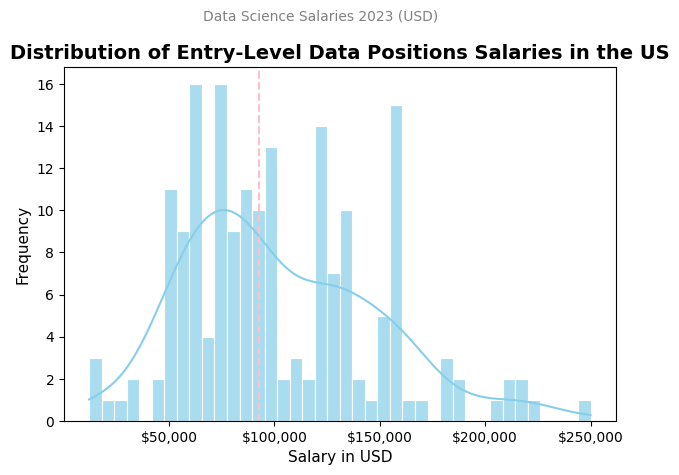

In [21]:
# Check the distribution of entry-level salaries in the US
histogram = sns.histplot(us_entry_salary['salary_in_usd'], bins=40, kde=True, color='skyblue', edgecolor='white', alpha=0.7)
plt.title('Distribution of Entry-Level Data Positions Salaries in the US', fontsize=14, weight='bold')
plt.suptitle('Data Science Salaries 2023 (USD)', fontsize=10, color='gray')
plt.xlabel('Salary in USD',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}')) # change the x-axis as currency format
# add a vertical line for the median salary
mean_salary = us_entry_salary['salary_in_usd'].median()
plt.axvline(mean_salary, color='pink', linestyle='--', linewidth=1.5, label=f'Mean: ${mean_salary:,.0f}')
plt.tight_layout()
plt.show()

#### For entry level position, what are some with relative high salary and not so competitive (records not so much)?

In [22]:
job_summary = us_entry_salary.groupby('job_title').agg(avg_salary = ('salary_in_usd', 'mean'), job_count=('job_title', 'count')).reset_index()
# # pick the top 15 job titles with the highest average salary
# job_summary = job_summary.sort_values(by='avg_salary', ascending=False).head(15)
# Get px.scatter to visualize the average salary vs job count
fig = px.scatter(
    job_summary,
    x='job_count',
    y='avg_salary',
    hover_name='job_title',  # 用 hover 替代 text
    title='Average Salary vs Job Count for Entry-Level Data Positions in the US',
    labels={'avg_salary': 'Average Salary (USD)', 'job_count': 'Job Count'},
    trendline='ols'
)
fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title='Job Count',
    yaxis_title='Average Salary (USD)',
    title_x=0.5,
    title_y=0.95
)
fig.show()


#### Which Data Position(s) have the most growth in salary when experience grow?

In [ ]:
# filter to only US data
salary_us = salary[salary['company_location'] == 'US']
# focus on only experience levels EN,MI, and SE
salary_us = salary_us[salary_us['experience_level'].isin(['entry', 'mid', 'senior'])]
# group by job title and experience level, then calculate the mean salary
salary_us_grouped = salary_us.groupby(['job_title', 'experience_level'], observed=True)['salary_in_usd'].mean().reset_index()
# Pivot the DataFrame to have job titles as rows and experience levels as columns
salary_us_pivoted = salary_us_grouped.pivot_table(index='job_title', columns='experience_level', values='salary_in_usd').reset_index()
# calculate the growth rate from entry to senior level
salary_us_pivoted['growth_rate'] = (salary_us_pivoted['senior'] - salary_us_pivoted['entry']) / salary_us_pivoted['entry'] * 100
# Sort the DataFrame by growth rate in descending order
salary_us_pivoted = salary_us_pivoted.sort_values(by='growth_rate', ascending=False)
# make salary currency format
salary_us_pivoted['entry'] = salary_us_pivoted['entry'].apply(lambda x: f'${x:,.0f}')
salary_us_pivoted['mid'] = salary_us_pivoted['mid'].apply(lambda x: f'${x:,.0f}')
salary_us_pivoted['senior'] = salary_us_pivoted['senior'].apply(lambda x: f'${x:,.0f}')
# Display the top 10 job titles with the highest growth rate
top_growth_jobs = salary_us_pivoted.head(10)
print("Top 10 job titles with the highest growth rate from entry to senior level in the US:")
print(top_growth_jobs)

Top 10 job titles with the highest growth rate from entry to senior level in the US:
experience_level                  job_title     entry       mid    senior  \
7                                BI Analyst   $44,000      $nan  $132,500   
29                             Data Manager   $61,450  $119,833  $135,850   
19                             Data Analyst   $70,260  $112,170  $124,519   
39                           Data Scientist  $105,481  $124,443  $165,281   
26                            Data Engineer  $109,806  $124,882  $156,759   
34                  Data Science Consultant   $90,000   $87,667  $123,950   
12                    Business Data Analyst   $74,000  $121,250  $100,000   
67                       Research Scientist  $140,000  $185,150  $183,217   
53                Machine Learning Engineer  $139,916  $161,838  $178,630   
66                        Research Engineer  $140,000  $178,000  $177,936   

experience_level  growth_rate  
7                  201.136364  
29 

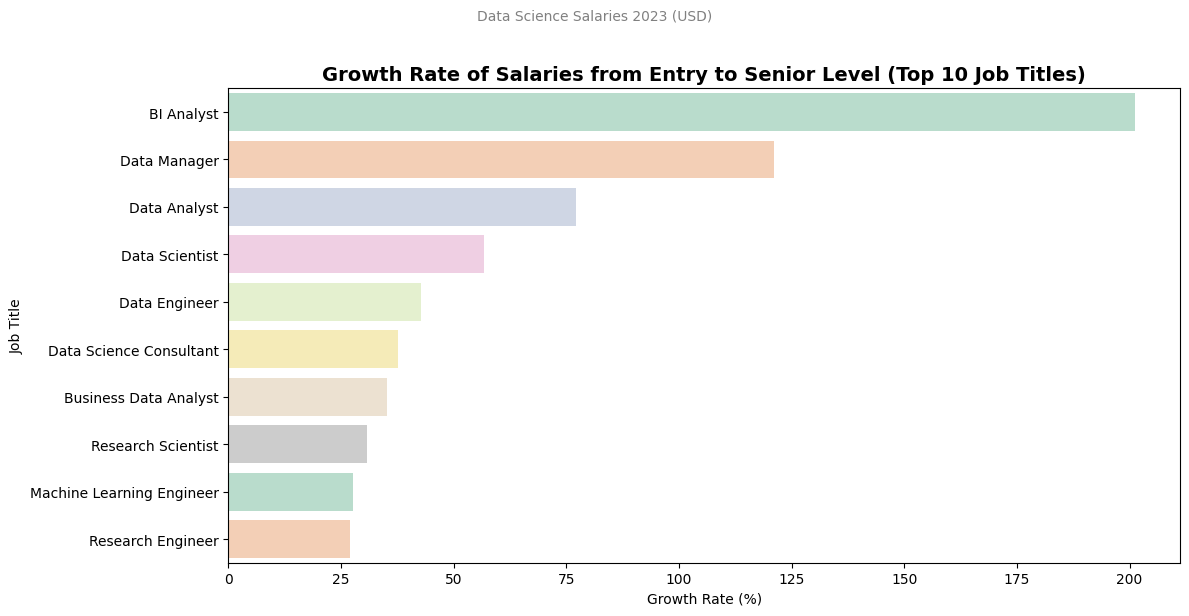

In [49]:
# Visulize the growth rate of salaries from entry to senior level for the top 10 job titles with bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_growth_jobs,
    x='growth_rate',
    y='job_title',
    hue='job_title',
    palette='Pastel2',
    legend= False
)
plt.title('Growth Rate of Salaries from Entry to Senior Level (Top 10 Job Titles)', fontsize=14, weight='bold')
plt.suptitle('Data Science Salaries 2023 (USD)', fontsize=10, y=1.02, color='gray')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Job Title')
plt.tight_layout()

#### What Job Titles have the most remote bonus?

To be specific, for each job titles, same experience levels, which position(s) have high rate for remote over onsite?

In [23]:
salary = pd.read_csv(csv_path)
salary = salary[salary['company_location'] == 'US']
salary_copy = salary.copy()

# For same job titles, experience levels, and remote ratios, calculate the average salary
grouped_salary = salary_copy.groupby(['job_title','experience_level','remote_ratio'],observed=True)['salary_in_usd'].mean().reset_index()
grouped_salary = grouped_salary[grouped_salary['remote_ratio'].isin([100,0])] # compare only remote and on-site salaries
# Pivot the DataFrame to have job titles as rows and remote ratios as columns
pivoted = grouped_salary.pivot_table(index=['job_title','experience_level'], columns='remote_ratio', values='salary_in_usd').reset_index()
pivoted.columns.name = None  # Remove the name of the columns index in case confusion
# calculate the difference between remote and on-site salaries
pivoted['remote_bonus'] = pivoted[100] - pivoted[0]
# Sort the DataFrame by the remote bonus in descending order
pivoted = pivoted.sort_values(by='remote_bonus', ascending=False)

pivoted['on_site'] = pivoted[0].apply(lambda x: f'${x:,.0f}')
pivoted['remote'] = pivoted[100].apply(lambda x: f'${x:,.0f}')
pivoted['remote_bonus'] = pivoted['remote_bonus'].apply(lambda x: f'${x:,.0f}') # change the money to currency format

# Display the top 10 job titles with the highest remote bonus
top_remote_bonus = pivoted[['job_title','experience_level','on_site','remote','remote_bonus']].head(10)
top_remote_bonus

,job_title,experience_level,on_site,remote,remote_bonus
109,Machine Learning Software Engineer,SE,"$178,000","$375,000","$197,000"
3,AI Scientist,MI,"$120,000","$200,000","$80,000"
61,Data Operations Engineer,SE,"$87,500","$164,925","$77,425"
49,Data Engineer,EX,"$173,686","$243,037","$69,351"
84,Financial Data Analyst,MI,"$75,000","$130,000","$55,000"
79,Data Specialist,SE,"$90,000","$140,000","$50,000"
24,Business Data Analyst,MI,"$95,000","$142,500","$47,500"
82,Director of Data Science,EX,"$284,167","$325,000","$40,833"
46,Data Architect,MI,"$137,000","$166,667","$29,667"
70,Data Science Manager,MI,"$147,375","$173,000","$25,625"


In [24]:
# Do the same quesiton but focsus on top three job titles
top3 = salary_copy['job_title'].value_counts().index[:3]
# filter the data for the three job titles
top3_bonus = salary_copy[salary_copy['job_title'].isin(top3)]
# Group by job title, experience level, and remote ratio, then calculate the mean salary
top3_grouped = top3_bonus.groupby(['job_title', 'experience_level', 'remote_ratio'], observed=True)['salary_in_usd'].mean().reset_index()
# Pivot the DataFrame to have job titles as rows and remote ratios as columns
top3_pivoted = top3_grouped.pivot_table(index=['job_title', 'experience_level'], columns='remote_ratio', values='salary_in_usd').reset_index()
top3_pivoted.columns.name = None  # Remove the name of the columns index in case confusion
# calculate the difference between remote and on-site salaries
top3_pivoted['remote_bonus'] = top3_pivoted[100] - top3_pivoted[0]
# Sort the DataFrame by the remote bonus in descending order
top3_pivoted = top3_pivoted.sort_values(by='remote_bonus', ascending=False)
top3_pivoted['on_site'] = top3_pivoted[0].apply(lambda x: f'${x:,.0f}')
top3_pivoted['remote'] = top3_pivoted[100].apply(lambda x: f'${x:,.0f}')
top3_pivoted['remote_bonus'] = top3_pivoted['remote_bonus'].apply(lambda x: f'${x:,.0f}')  # change the money to currency format
# Display the top 10 job titles with the highest remote bonus for the top three job titles
top3_remote_bonus = top3_pivoted[['job_title', 'experience_level', 'on_site', 'remote', 'remote_bonus']].head(10)
print("Top 10 job titles with the highest remote bonus for the top three job titles:")
print(top3_remote_bonus)

Top 10 job titles with the highest remote bonus for the top three job titles:
         job_title experience_level   on_site    remote remote_bonus
5    Data Engineer               EX  $173,686  $243,037      $69,351
8   Data Scientist               EN  $103,888  $110,378       $6,489
7    Data Engineer               SE  $155,489  $158,664       $3,175
11  Data Scientist               SE  $164,747  $165,988       $1,240
0     Data Analyst               EN   $70,400   $71,059         $659
6    Data Engineer               MI  $125,368  $123,886      $-1,483
3     Data Analyst               SE  $128,993  $119,807      $-9,186
10  Data Scientist               MI  $135,662  $116,662     $-19,000
2     Data Analyst               MI  $117,471   $97,669     $-19,803
4    Data Engineer               EN  $119,972   $81,654     $-38,318


It is noticed that for most those common data positions, on-sites gets higher paid compared to remote, except for high experience level of data engineer and data scientist.